In [47]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sfm.plotstyle import set_seaborn_style, set_style_after, pkmn_type_colors

import os

# MNIST

In [48]:
# list all runs in runs/
# Get current notebook path since __file__ isn't defined in notebooks
currentfile = os.path.abspath('')
currentdir = os.path.dirname(currentfile)
runs = os.listdir(f"{currentdir}/runs")
print(runs)

# filter for target distributions
targetdist = "mnist"
runs = [run for run in runs if f"-{targetdist}" in run]

# order alphabetically
runs = sorted(runs)
print(runs)


['gaussian-mnist-ot', 'beta-moons', 'beta-moons-ot', 'gaussian-moons', 'datafittednormal-mnist-ot', 'multivariate-mnist-ot', 'chi2-moons', 'pareto-moons', 'gamma-mnist-ot', 'dirichlet-moons-ot', 'gamma-moons', 'mog-moons', 'diagonal-moons-ot', 'laplace-mnist-ot', '8gaussians-mnist-ot', 'datafittednormal-moons', 'cauchy-moons', 'multivariate-moons', '8gaussians-mnist', 'laplace-mnist', 'normal-moons-lipman', 'gamma-mnist', 'normal-moons-ot', 'gmm-mnist-ot', 'fisher-moons-ot', 'beta-mnist-ot', 'diagonal-moons', 'beta-mnist', 'multivariate-moons-ot', 'dirichlet-moons', '8gaussians-moons', 'lognormal-moons-ot', 'studentt-moons', 'diagonal-mnist', 'mog-mnist-ot', 'gumbel-moons-ot', 'multivariate-mnist', 'uniform-mnist-ot', 'lognormal-moons', 'uniform-moons-ot', 'gaussian-moons-ot', 'normal-mnist-ot', 'gumbel-moons', 'normal-mnist-lipman', 'studentt-moons-ot', 'gaussian-mnist', 'datafittednormal-mnist', 'pareto-moons-ot', 'cauchy-moons-ot', 'diagonal-mnist-ot', 'chi2-moons-ot', 'laplace-moon

In [49]:
# list files in first run
files = os.listdir(f"{currentdir}/runs/{runs[4]}")
print(files)


['traj_2999_is100.png', 'train', 'gif', 'sidebyside', 'traj_1499_is100.png', 'intsteps_gen.png', 'traj_499_is100.png', 'losses.npy', 'traj_1999_is100.png', 'traj_3499_is100.png', 'traj_datafittednormal-to-mnist_is11.gif', 'traj_999_is100.png', 'traj_0_is100.png', 'integrationsteps', 'traj_2499_is100.png', 'traj_4499_is100.png', 'logprob_datafittednormal-to-mnist_sidebyside.png', 'tcfmunet_4680.pth', 'traj_3999_is100.png', 'intsteps_list.npy']


In [50]:
exclude = ["dirichlet", "beta", "gamma", "multivariate", "cauchy"]
filtered_runs = [run for run in runs if not any(e in run for e in exclude)]


In [51]:
# collect generated samples
# runs/datafittednormal-mnist/gif/gentrajfinal.png
# plot the latest file in runs/<run>/trajectory/

gen_images = {}
for run in runs:
    _dir1 = f"{currentdir}/runs/{run}/gif/" 
    _dir2 = f"{currentdir}/runs/{run}/trajectory/" 
    if os.path.exists(_dir1):
        _files = os.listdir(_dir1)
        _dir = _dir1
    elif os.path.exists(_dir2):
        _files = os.listdir(_dir2)
        _dir = _dir2
    else: 
        continue
    
    # time is in format _0.92.png
    if "gentrajfinal.png" in _files:
        latest_file = "gentrajfinal.png"
    elif len(_files) > 0:
        _times = [float(file.split("_")[-1].split(".")[0]) for file in _files]
        latest_file = _files[_times.index(max(_times))]
    else:
        print(f"No files in {_dir}")
        continue
    
    print(run)
    
    fname = f"{_dir}/{latest_file}"
    gen_images[run] = fname


8gaussians-mnist
8gaussians-mnist-ot
beta-mnist
beta-mnist-ot
datafittednormal-mnist
datafittednormal-mnist-ot
diagonal-mnist
diagonal-mnist-ot
gamma-mnist
gamma-mnist-ot
gaussian-mnist
gaussian-mnist-ot
laplace-mnist
laplace-mnist-ot
mog-mnist-ot
multivariate-mnist
multivariate-mnist-ot
normal-mnist
normal-mnist-ot
uniform-mnist
uniform-mnist-ot


In [52]:
# # plot generated samples
# # # They all look the same

# for run in gen_images.keys():
#     fname = gen_images[run]
#     if os.path.exists(fname):
#         plt.imshow(plt.imread(fname))
#     else:
#         print(f"File {fname} does not exist")
#         continue
#     print(run)
#     plt.axis('off')
#     plt.tight_layout(pad=0)
#     plt.show()
#     plt.close()

In [69]:
def plot_gen(_runs, _tmpnames, _imgs):
    height = 6
    width = height * len(_runs) 

    plt.close()
    fig, axs = plt.subplots(1, len(plot_runs), figsize=(width, height))
    fig.subplots_adjust(wspace=0, hspace=0)
    
    # set_seaborn_style()
    for i, run in enumerate(_runs):
        fname = _imgs[run]
        if os.path.exists(fname):
            _fig = plt.imread(fname)
            plt.axis('off')
            # plt.gca().set_xticks([])
            # plt.gca().set_yticks([])
            plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
            plt.tight_layout(pad=0)
            # crop border
            # remove border in percent
            _w = _fig.shape[1] # img is quadratic
            dw = int(0.1 * _w)
            if "8gaussians" in run:
                dw = int(0.01 * _w)
            # _fig = _fig[dw:_w-dw, dw:_w-dw, :]
            axs[i].set_xticks([])
            axs[i].set_yticks([])
            axs[i].axis('off')
            axs[i].imshow(_fig, aspect='equal')
            axs[i].title.set_text(_tmpnames[run])
            axs[i].set_aspect('equal')
            axs[i].set_adjustable('box') # box, datalim
        else:
            print(f"File {fname} does not exist")
            continue

    fig.subplots_adjust(wspace=0, hspace=0)
    plt.axis('off')
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])
    plt.tight_layout(pad=0)
    plt.show()
    plt.close()

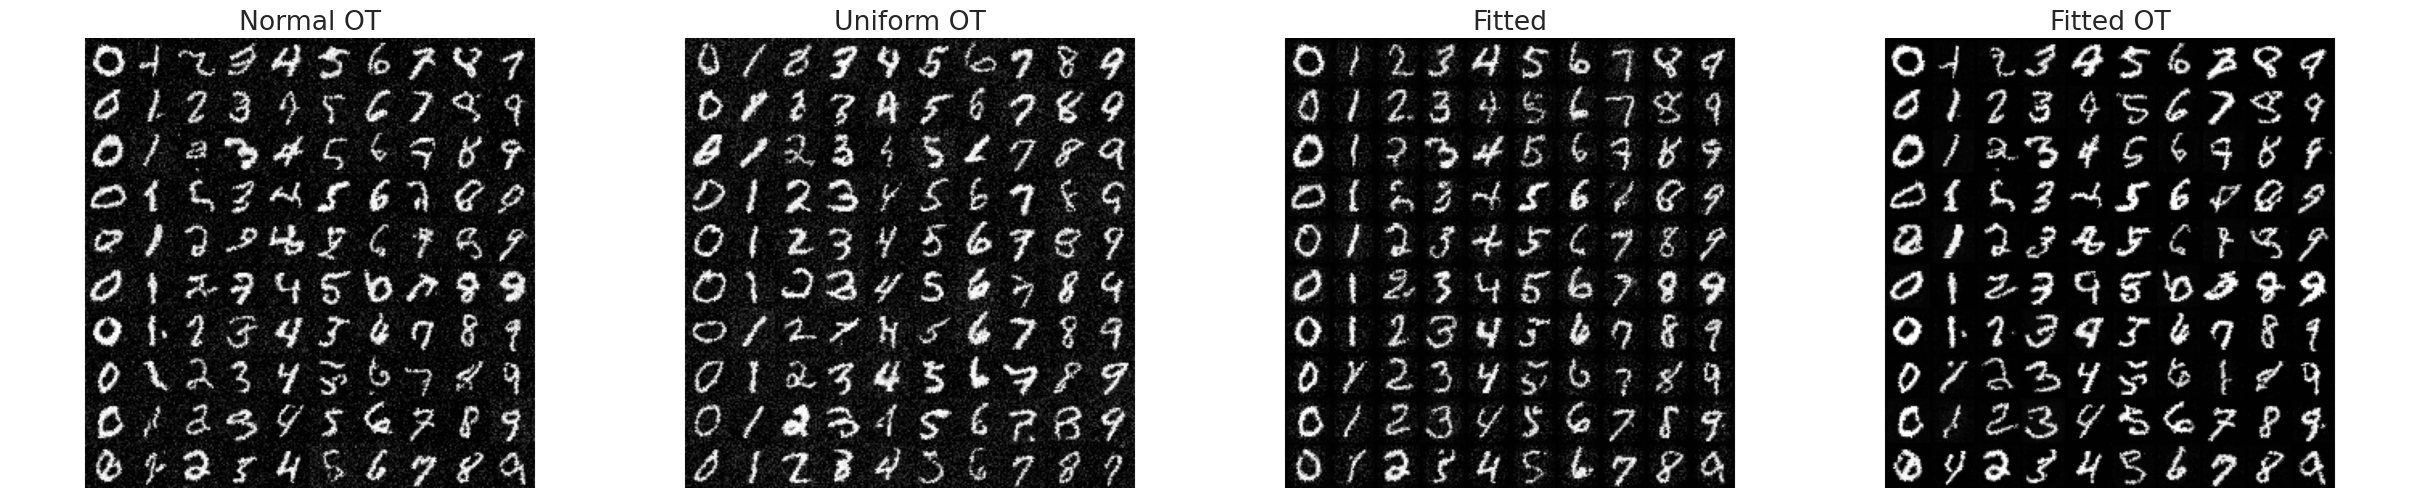

In [70]:
# choose a couple of runs and plot final flow side by side
plot_runs = [
    "normal-mnist-ot", "uniform-mnist-ot", "datafittednormal-mnist", "datafittednormal-mnist-ot"
]

tempnames = {
    "normal-mnist": "Normal",
    "normal-mnist-ot": "Normal OT",
    "datafittednormal-mnist": "Fitted",
    "datafittednormal-mnist-ot": "Fitted OT",
    "uniform-mnist-ot": "Uniform OT",
}


plot_gen(plot_runs, tempnames, gen_images)

In [55]:
# exclude = ["dirichlet", "beta", "gamma", "multivariate", "cauchy", "gmm", "diagonal"]
exclude = ["dirichlet", "beta", "multivariate", "gmm", "diagonal", "gaussian"]
filtered_runs = [run for run in runs if not any(e in run for e in exclude)]


In [56]:

runsfiltered = filtered_runs

# get logprobs_train.npy and losses.npy for every run into a dict
logprobs_train = {}
losses = {}
for run in runsfiltered:
    fname = f"{currentdir}/runs/{run}/losses.npy"
    if os.path.exists(fname):
        # logprobs_train[run] = np.load(f"{currentdir}/runs/{run}/logprobs_train.npy")
        losses[run] = np.load(fname)

runsfiltered = losses.keys()


In [57]:
# every model its own color
colors = sns.color_palette("deep", len(runsfiltered))
# colors = pkmn_type_colors
_cmap = {run: colors[i] for i, run in enumerate(runsfiltered)}

In [58]:
def get_human_name(_run):
    _run = _run.replace(f"-{targetdist}", "")
    ot = True if "-ot" in _run else False
    _run = _run.replace("-ot", "")
    _namesdict = {
        "dirichlet": "Dirichlet",
        "beta": "Beta",
        "gamma": "Gamma",
        "mog": "2Gaussians",
        "multivariate": "Multivariate",
        "8gaussians": "8Gaussians",
        "diagonal": "DiagGaussian",
        "laplace": "Laplace",
        "uniform": "Uniform",
        "gaussian": "Gaussian",
        "normal": "Normal",
        "lipman": "Lipman",
        "datafittednormal": "Fitted",
    }
    if _run in _namesdict:
        return f"{_namesdict[_run]}{' OT' if ot else ''}"
    else:
        return _run

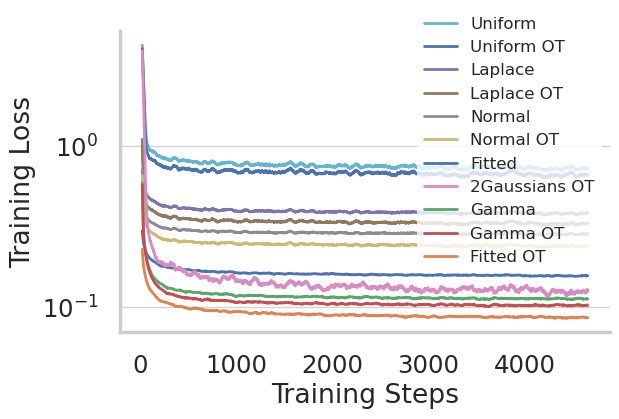

In [59]:
# plot losses.npy for every run
# apply smoothing to losses.npy
losses_smooth = {}
# first column is x=step, second column is y=loss
window_size = 51  # Use odd number to ensure equal padding on both sides
for run in runsfiltered:
    # Apply smoothing separately to x and y columns
    x = losses[run][:, 0]  # time steps
    y = losses[run][:, 1]  # loss values
    # Smooth only the y values
    y_smooth = np.convolve(y, np.ones(window_size)/window_size, mode='valid')
    # Trim x and y_smooth to same length
    trim = (window_size - 1) // 2
    x = x[trim:-trim]
    # Verify lengths match
    assert len(x) == len(y_smooth), f"Length mismatch: x={len(x)}, y_smooth={len(y_smooth)}"
    # Recombine into array
    losses_smooth[run] = np.column_stack((x, y_smooth))

# subsample, only plot every n'th point
n = 1
losses_smooth = {run: losses_smooth[run][::n, :] for run in runsfiltered}

set_seaborn_style()
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.set_yscale("log")
# sort runsfiltered by lowest final loss
_runsfiltered = sorted(runsfiltered, key=lambda x: -losses_smooth[x][-1, 1])
for run in _runsfiltered:
    ax.plot(
        losses_smooth[run][:, 0], losses_smooth[run][:, 1], 
        label=get_human_name(run), 
        linewidth=2,
        color=_cmap[run]
    )
ax.set_xlabel("Training Steps")
ax.set_ylabel("Training Loss")
set_style_after(ax, legend=True, loc="upper right", bbox_to_anchor=(1.0, 1.1), fs=12)
plt.show()
plt.close()

{'datafittednormal-mnist': 38, 'datafittednormal-mnist-ot': 58.4, 'gamma-mnist': 44, 'gamma-mnist-ot': 38, 'laplace-mnist': 62, 'laplace-mnist-ot': 56, 'mog-mnist-ot': 116.0, 'normal-mnist': 56, 'normal-mnist-ot': 44, 'uniform-mnist': 86, 'uniform-mnist-ot': 86}


/tmp/ipykernel_10933/2251998013.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


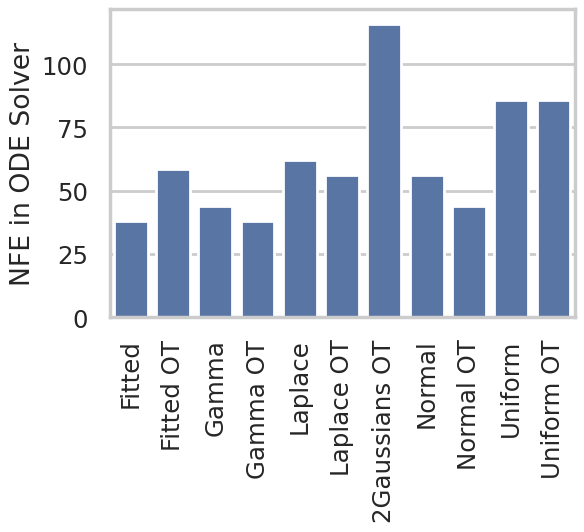

In [60]:
# get NFE for every run
# runs/multivariate-moons/integrationsteps/nfe.npy

nfe = {}
for run in runsfiltered:
    fname1 = f"{currentdir}/runs/{run}/integrationsteps/nfe.npy"
    fname2 = f"{currentdir}/runs/{run}/integrationsteps/solver_results.npy"
    if os.path.exists(fname1):
        nfe[run] = np.load(fname1).item()
    elif os.path.exists(fname2):
        _nfe = np.load(fname2, allow_pickle=True).item()
        nfe[run] = np.mean(_nfe['nfe']['dopri5']).item()
    else:
        print(f"File {fname1} or {fname2} does not exist")
        continue
print(nfe)

nfe_human = {get_human_name(run): nfe[run] for run in nfe}

# plot nfe for every run as a barplot

set_seaborn_style()
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
# ax.set_yscale("log")
sns.barplot(x=list(nfe_human.keys()), y=nfe_human.values(), ax=ax)
ax.set_ylabel("NFE in ODE Solver")
# make xticks vertical
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()
plt.close()


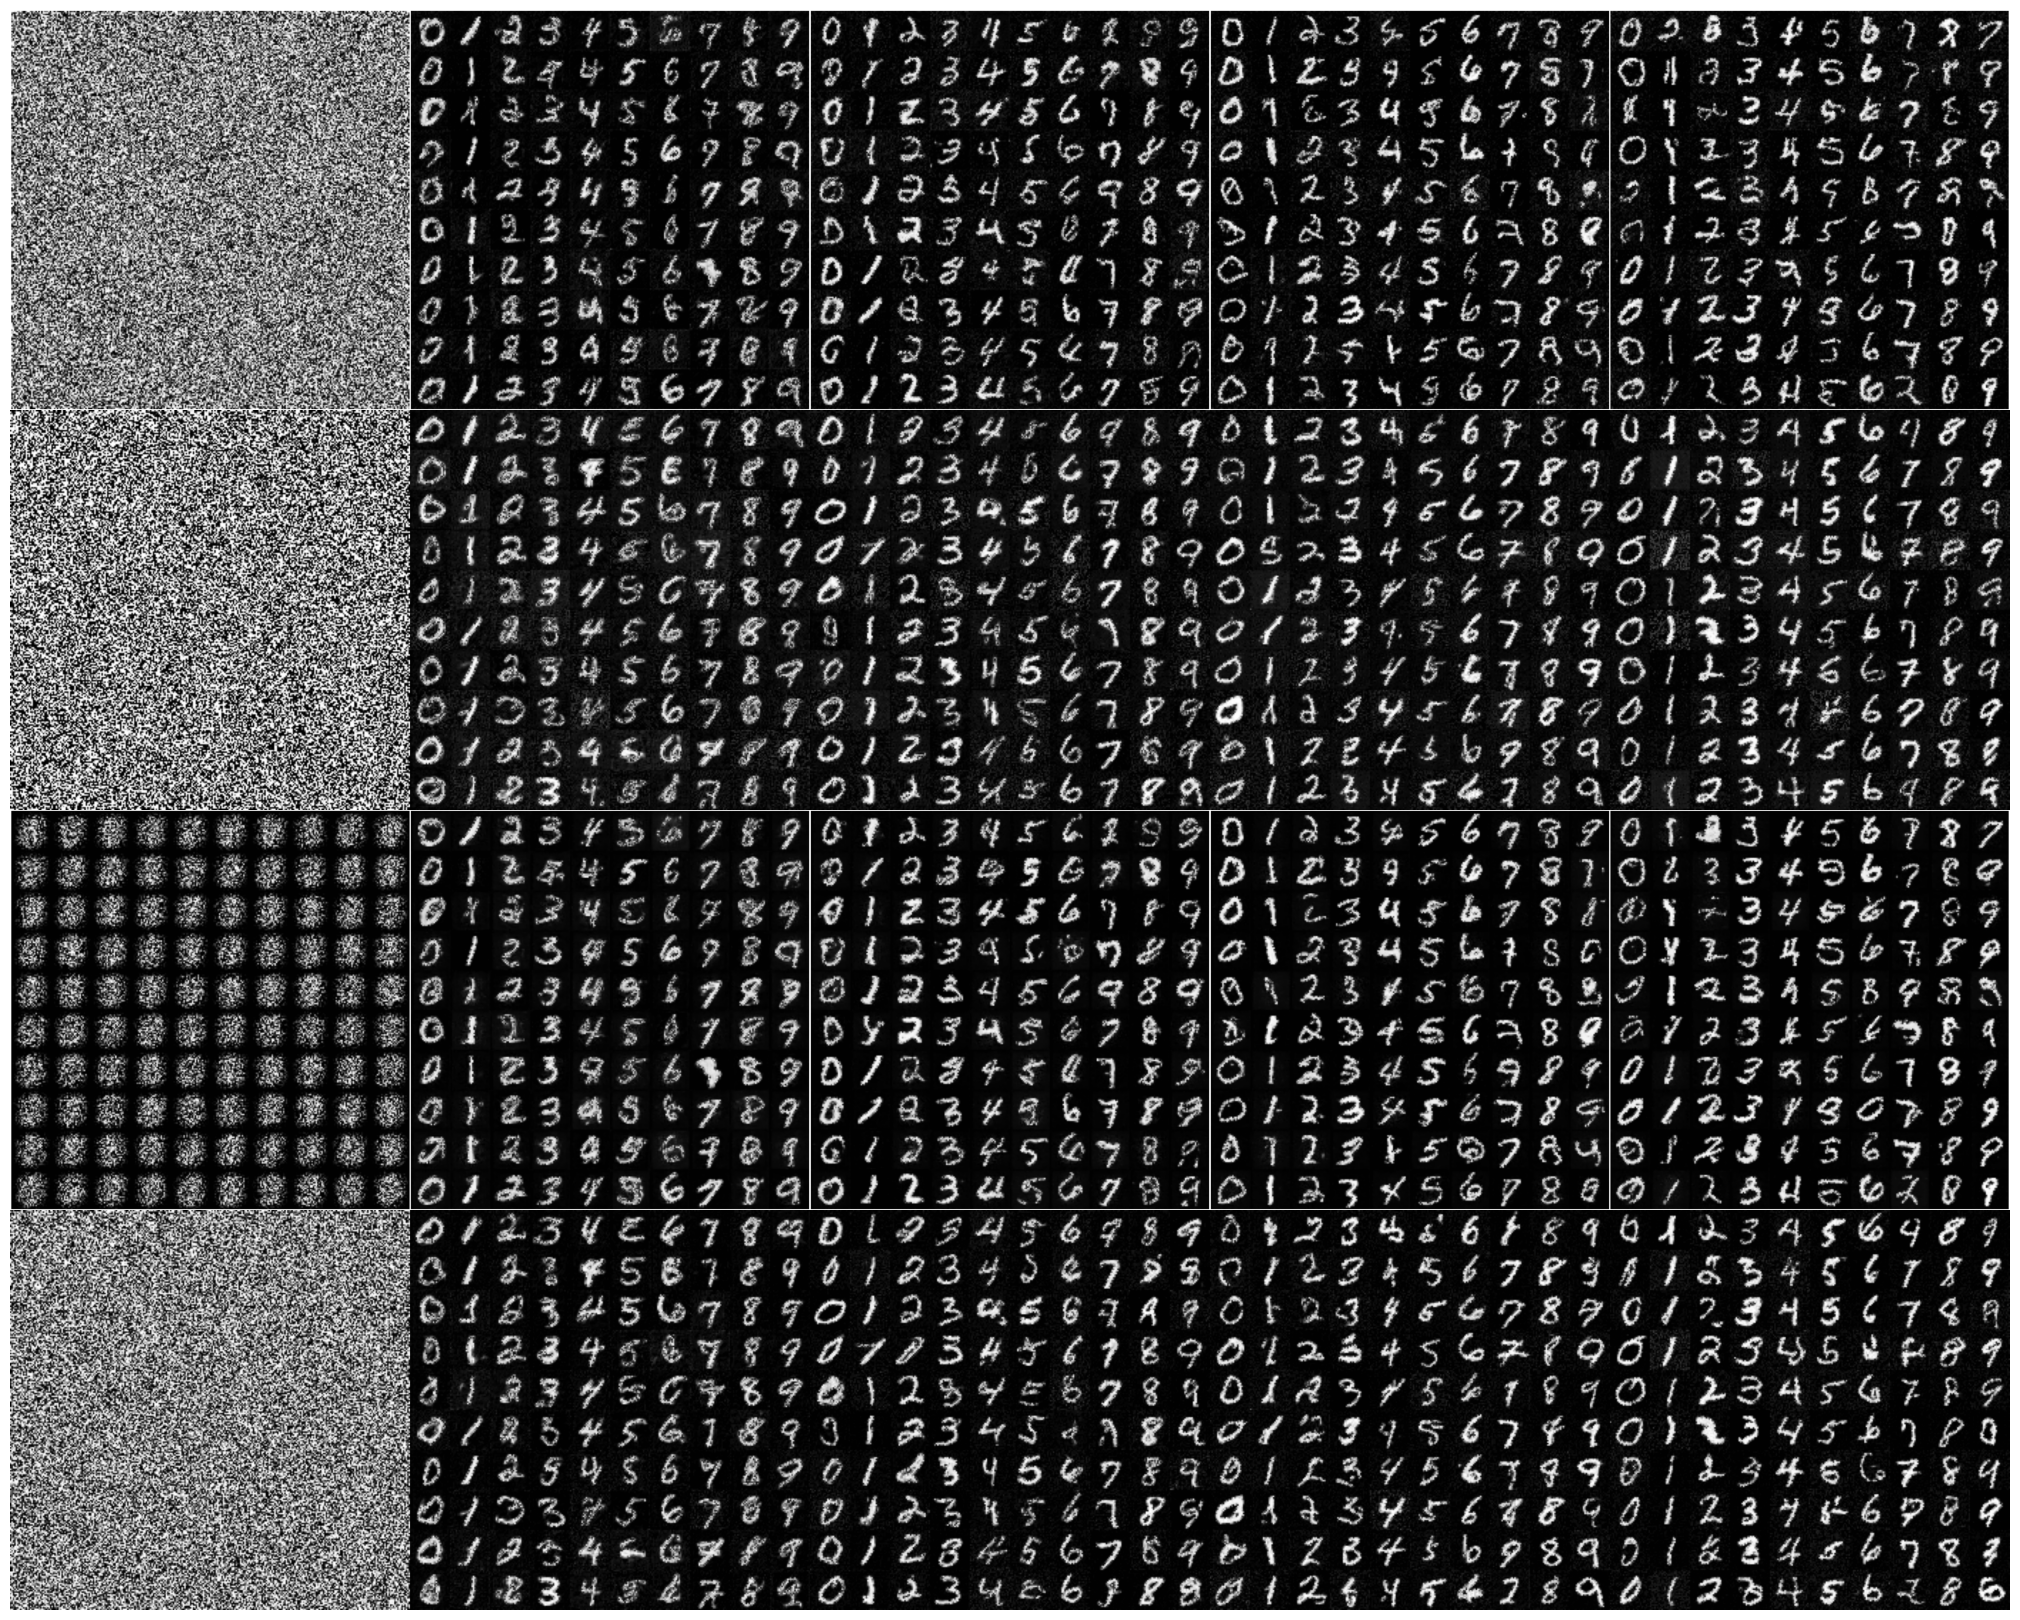

In [61]:
# plot a couple below each other
#  /ssd/gen/fm/runs/datafittednormal-mnist-ot/intsteps_gen.png
plot_runs = [
    "normal-mnist-ot", "uniform-mnist-ot", "datafittednormal-mnist-ot", "laplace-mnist-ot"
]

height_one_plot = 4
width = height_one_plot * 5
fig, axs = plt.subplots(len(plot_runs), 1, figsize=(width, height_one_plot*len(plot_runs)))
for i, run in enumerate(plot_runs):
    fname = f"{currentdir}/runs/{run}/intsteps_gen.png"
    if os.path.exists(fname):
        axs[i].imshow(plt.imread(fname))
    else:
        print(f"File {fname} does not exist")
        continue
    axs[i].axis('off')
    # axs[i].tight_layout(pad=0)
plt.tight_layout(pad=0)
plt.show()
plt.close()
